In [89]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

Q1

In [90]:
def rk4(f,t0,x0,tau,n):
    if isinstance(x0,int):
        m=1
    else:
        m=np.shape(x0)[0]
    traj=np.zeros((int(n+1),m+1))
    h=(tau-t0)/n 
    s=x0
    for k in range(int(n +1)):
        t = t0 + k * h
        traj[k,0] = t
        traj[k,1:] = s
        k1 = f(t, s )
        k2 = f(t + h /2, s + h * k1 /2)
        k3 = f(t + h /2, s + h * k2 /2)
        k4 = f(t + h, s + h * k3)
        s = s + h /6 * (k1 + 2* k2 + 2* k3 + k4 )
        
    return traj

Q2

In [91]:
def f(t,x):
    return x
x0=1
t0=0
tau=1
N=10
table=np.zeros((N,8))
for i in range(N):
    n=2**i
    table[i,0]=n
    table[i,1]=(tau-t0)/n
    table[i,2]=rk4(f,t0,x0,tau,n)[-1,1]
    if n%2==0:    
        table[i,3]=rk4(f,t0,x0,tau,n/2)[-1,1]
    else:
        table[i,3]="NaN"
    if n%4==0:
        table[i,4]=rk4(f,t0,x0,tau,n/4)[-1,1]
    else:
        table[i,4]="NaN"
table[:,5]=abs(table[:,2]-math.exp(1))
table[:,6]=abs(table[:,2]-table[:,3])
table[:,7]=abs(table[:,2]-table[:,3])/abs(table[:,3]-table[:,4])
ptable=pd.DataFrame(table[:,[0,1,2,5,6,7]],columns=['n','h','s1^_n','s1^_n-e','diff','ratio'])
ptable

,n,h,s1^_n,s1^_n-e,diff,ratio
0,1.0,1.000000,2.708333,9.948495e-03,NaN,NaN
1,2.0,0.500000,2.717346,9.356371e-04,9.012858e-03,NaN
2,4.0,0.250000,2.718210,7.188926e-05,8.637478e-04,0.095835
3,8.0,0.125000,2.718277,4.984042e-06,6.690522e-05,0.077459
4,16.0,0.062500,2.718282,3.281185e-07,4.655924e-06,0.069590
5,32.0,0.031250,2.718282,2.104785e-08,3.070706e-07,0.065953
6,64.0,0.015625,2.718282,1.332722e-09,1.971513e-08,0.064204
7,128.0,0.007812,2.718282,8.384093e-11,1.248881e-09,0.063346
8,256.0,0.003906,2.718282,5.260681e-12,7.858025e-11,0.062921
9,512.0,0.001953,2.718282,3.286260e-13,4.932055e-12,0.062765


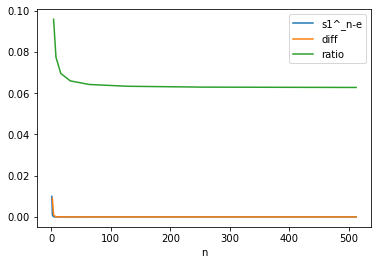

In [92]:
plt.plot(ptable['n'],ptable['s1^_n-e'],label="s1^_n-e")
plt.plot(ptable['n'],ptable['diff'],label="diff")
plt.plot(ptable['n'],ptable['ratio'],label="ratio")
plt.xlabel('n')
plt.legend()
plt.show()

The numerical approximation does not change when n is larger than 16 in Python, and its difference beteen  true value at t=1 is decreasing.It may has something to do with Python's rule for storing bytes, but it also says that even though incresing n can decrease error, but there is no point setting n too big.Last two collumns are decreasing and fluctuating, implying that for large n, the difference between sRKn(1),sRKn/2(1) and sRKn/4(1) are small.

Q4    
(a)

In [93]:
MU=[0.55,0.45,0.35]
lam=0.25
def f(t,x):
    global u
    x1=x[0]
    x2=x[1]
    x1_new=-x2
    x2_new=lam-mu*x2-x1**2-x1*x2
    return np.array([x1_new,x2_new])
def f_minus(t,x):
    global u
    x1=x[0]
    x2=x[1]
    x1_new=x2
    x2_new=-(lam-mu*x2-x1**2-x1*x2)
    return np.array([x1_new,x2_new])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10524\2176323016.py:8: RuntimeWarning: overflow encountered in double_scalars
  x2_new=lam-mu*x2-x1**2-x1*x2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10524\2176323016.py:8: RuntimeWarning: invalid value encountered in double_scalars
  x2_new=lam-mu*x2-x1**2-x1*x2


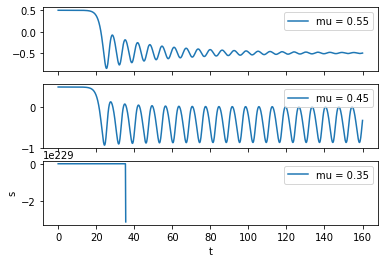

In [94]:
t0=0
tau=160
x0=[0.499999,0]
n=1000
i=0
fig,axes = plt.subplots(3,1, sharex=True)
for mu in MU:    
    traj=rk4(f,t0,x0,tau,n)
    t=traj[:,0]
    st=traj[:,1]
    plt.xlabel("t")
    plt.ylabel("s")
    axes[i].plot(t, st, label="mu = "+str(mu))
    axes[i].legend(loc='upper right')
    i+=1
plt.show()

(b)

In [95]:
import sympy 
lam=0.25
x1 = sympy.symbols('x1')
x2 = sympy.symbols('x2')
mu = sympy.symbols('mu')
f1 = - x2
f2 = lam - mu * x2 - x1 **2 - x1 * x2
MU=[0.55,0.45,0.35]


In [96]:
#find jacobian matrix at steady state=(0.5,0)
funcs=sympy.Matrix([f1,f2])
args=sympy.Matrix([x1,x2])
df1=funcs.jacobian(args).subs([(x1,0.5), (x2,0),(mu,0.55)])
df1=np.array(df1,dtype=float)
df2=funcs.jacobian(args).subs([(x1,0.5), (x2,0),(mu,0.45)])
df2=np.array(df2,dtype=float)
df3=funcs.jacobian(args).subs([(x1,0.5), (x2,0),(mu,0.35)])
df3=np.array(df3,dtype=float)

In [97]:
#find saddle point
for m in MU:
    mu=m
    eq1 = sympy.Eq(f1 , 0)
    eq2 = sympy.Eq(f2 , 0)
    print(sympy.solve((eq1,eq2), (x1, x2)))
# it coincides the answer of q3, and mu>-sqrt(lambda),so the positive solution should be a saddle point.

[(-0.500000000000000, 0.0), (0.500000000000000, 0.0)]
[(-0.500000000000000, 0.0), (0.500000000000000, 0.0)]
[(-0.500000000000000, 0.0), (0.500000000000000, 0.0)]


In [98]:
#find eigenvalues and eigenvectors
eigval, eigvec = np.linalg.eig(df1)
print(eigval)
print(eigvec)#columns are eigenvectors

[ 0.6044357 -1.6544357]
[[ 0.85581362  0.5172843 ]
 [-0.5172843   0.85581362]]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10524\2176323016.py:8: RuntimeWarning: overflow encountered in double_scalars
  x2_new=lam-mu*x2-x1**2-x1*x2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10524\2176323016.py:8: RuntimeWarning: invalid value encountered in double_scalars
  x2_new=lam-mu*x2-x1**2-x1*x2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10524\2176323016.py:15: RuntimeWarning: overflow encountered in double_scalars
  x2_new=-(lam-mu*x2-x1**2-x1*x2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10524\2176323016.py:8: RuntimeWarning: overflow encountered in double_scalars
  x2_new=lam-mu*x2-x1**2-x1*x2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10524\2176323016.py:8: RuntimeWarning: invalid value encountered in double_scalars
  x2_new=lam-mu*x2-x1**2-x1*x2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10524\2176323016.py:15: RuntimeWarning: overflow encountered in double_scalars
  x2_new=-(lam-mu*x2-x1**2-x1*x2)
C:\Users\Adminis

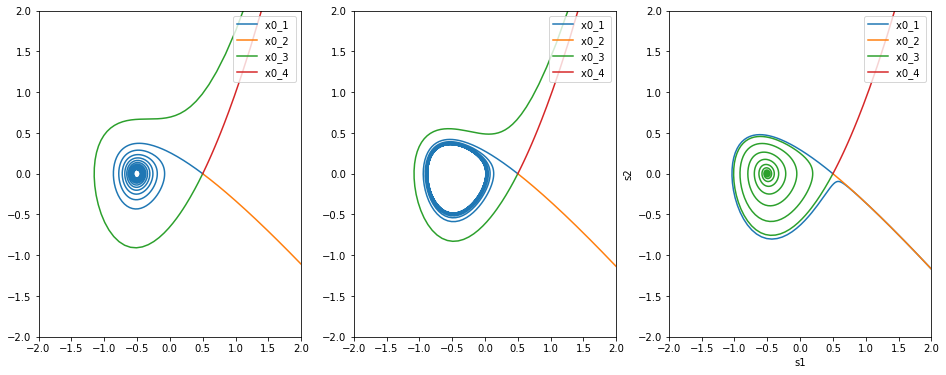

In [99]:
x_bar=np.array([0.5,0])
t0=0
h=10**-6
n=1000
tau_range=[10,200]
tau=100
#mu = sympy.symbols('mu')-x1]])
def df(x1,x2,mu):
    return np.array([[0,-1],[-2*x1-x2,-mu-x1]])

fig,axes=plt.subplots(1,3,figsize=(16, 6))

for i in range(3):
    """df=funcs.jacobian(args).subs([(x1,0.5), (x2,0),(mu,MU[i])])
    df=np.array(df,dtype=float)
    """
    mu=MU[i]
    dff=df(0.5,0,mu)
    eigval, eigvec = np.linalg.eig(dff)
    v1=eigvec[:,0]
    v2=eigvec[:,1]
    x0_1=x_bar-h*v1
    x0_2=x_bar+h*v1
    x0_3=x_bar-h*v2
    x0_4=x_bar+h*v2
    traj_1=rk4(f,t0,x0_1,tau,n)
    traj_2=rk4(f,t0,x0_2,tau,n)
    traj_3=rk4(f_minus,t0,x0_3,tau,n)
    traj_4=rk4(f_minus,t0,x0_4,tau,n)   
    axes[i].plot(traj_1[:,1],traj_1[:,2], label="x0_1 ")
    axes[i].plot(traj_2[:,1],traj_2[:,2], label="x0_2 ")
    axes[i].plot(traj_3[:,1],traj_3[:,2], label="x0_3 ")
    axes[i].plot(traj_4[:,1],traj_4[:,2], label="x0_4 ")
    axes[i].legend(loc='upper right')
    axes[i].set_xlim(left=-2,right=2)
    axes[i].set_ylim(top=2,bottom=-2)
    plt.xlabel("s1")
    plt.ylabel("s2")
plt.show()